<a href="https://colab.research.google.com/github/schadracknkulu2-max/ML_BAC4_UMK/blob/main/Dan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("dataset_supervision_reseau.xlsx")
df.head()

,failed_connections,packet_size,dest_port,protocol,target
0,4,1300,21,UDP,0
1,1,797,22,ICMP,1
2,3,777,21,ICMP,1
3,3,759,53,ICMP,1
4,1,445,8080,ICMP,1


In [ ]:
encoder = LabelEncoder()
df["protocol"] = encoder.fit_transform(df["protocol"])


In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("🔹 Accuracy :", accuracy_score(y_test, y_pred))
print("🔹 Précision :", precision_score(y_test, y_pred))
print("🔹 Rappel :", recall_score(y_test, y_pred))
print("🔹 Score F1 :", f1_score(y_test, y_pred))

🔹 Accuracy : 1.0
🔹 Précision : 1.0
🔹 Rappel : 1.0
🔹 Score F1 : 1.0


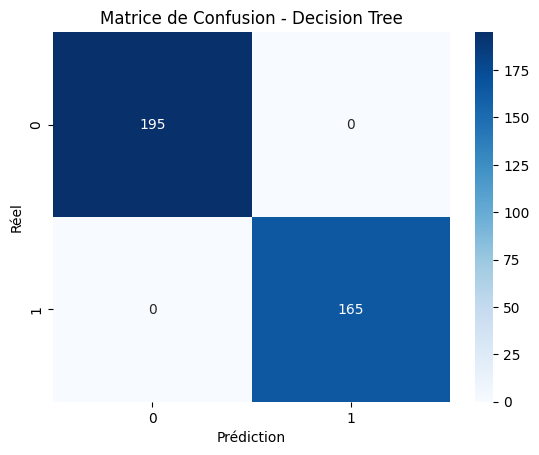

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matrice de Confusion - Decision Tree")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

In [ ]:
iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

🔹 F1 Score (Isolation Forest) : 0.22885572139303484


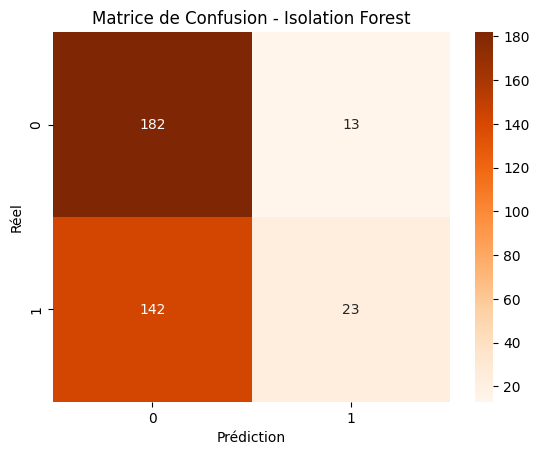

In [ ]:
y_pred_iso = iso.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

print("🔹 F1 Score (Isolation Forest) :", f1_score(y_test, y_pred_iso))

cm_iso = confusion_matrix(y_test, y_pred_iso)
sns.heatmap(cm_iso, annot=True, cmap="Oranges", fmt="d")
plt.title("Matrice de Confusion - Isolation Forest")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()